<a href="https://colab.research.google.com/github/Nithinsp2001/GAN_Model/blob/main/Basic_GAN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
epoch : 10
epoch : 11
epoch : 12
epoch : 13
epoch : 14
epoch : 15
epoch : 16
epoch : 17
epoch : 18
epoch : 19
epoch : 20
epoch : 21
epoch : 22
epoch : 23
epoch : 24
epoch : 25
epoch : 26
epoch : 27
epoch : 28
epoch : 29
epoch : 30
epoch : 31
epoch : 32
epoch : 33
epoch : 34
epoch : 35
epoch : 36
epoch : 37
epoch : 38
epoch : 39
epoch : 40
epoch : 41
epoch : 42
epoch : 43
epoch : 44
epoch : 45
epoch : 46
epoch : 47
epoch : 48
epoch : 49
epoch : 50
epoch : 51
epoch : 52
epoch : 53
epoch : 54
epoch : 55
epoch : 56
epoch : 57
epoch : 58
epoch : 59
epoch : 60
epoch : 61
epoch : 62
epoch : 63
epoch : 64
epoch : 65
epoch : 66
epoch : 67
epoch : 68
epoch : 69
epoch : 70
epoch : 71
epoch : 72
epoch : 73
epoch : 74
epoch : 75
epoch : 76
epoch : 77
epoch : 78
epoch : 79
epoch : 80
epoch : 81
epoch : 82
epoch : 83
epoch : 84
epoch : 85
epoch : 86
epoch : 87
epoch : 88
epoch : 89
epoch : 90
epoch : 9

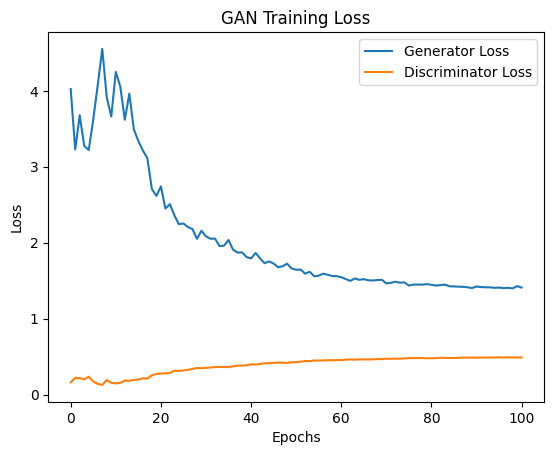

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Generator architecture
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x).view(-1, 1, 28, 28)

# Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x.view(-1, 784))

#Prepare the Training Data
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

epochs = 101
loss_g_list = []
loss_d_list = []

for epoch in range(epochs):
    print(f"epoch :",epoch)
    total_loss_g = 0
    total_loss_d = 0
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Generate fake images
        noise = torch.randn(batch_size, 100).to(device)
        fake_imgs = generator(noise)

        # Train discriminator
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        loss_d_real = criterion(discriminator(real_imgs), real_labels)
        loss_d_fake = criterion(discriminator(fake_imgs.detach()), fake_labels)
        loss_d = (loss_d_real + loss_d_fake) / 2

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Train generator
        loss_g = criterion(discriminator(fake_imgs), real_labels)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

        total_loss_g += loss_g.item()
        total_loss_d += loss_d.item()

    loss_g_list.append(total_loss_g / len(dataloader))
    loss_d_list.append(total_loss_d / len(dataloader))


    if epoch == 0 or epoch == 50 or epoch == 100:
        with torch.no_grad():
            noise = torch.randn(16, 100).to(device)
            sample_imgs = generator(noise).cpu()
            torchvision.utils.save_image(sample_imgs, f"generated_epoch_{epoch}.png", normalize=True)

print("Training complete!")

#. Visualizing Results

import matplotlib.pyplot as plt

plt.plot(loss_g_list, label="Generator Loss")
plt.plot(loss_d_list, label="Discriminator Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Training Loss")
plt.show()